In [1]:
# COSC 4610 Final Project
import pandas as pd

In [2]:
# Read in liquor sales dataset (go make some coffee)
liquor = pd.read_csv('data/Iowa_Liquor_Sales.csv', parse_dates=True, index_col='Invoice/Item Number').sort_values('Date')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Makes all county names uniform (all caps, no "COUNTY")
def correctCounty(county):
    if isinstance(county, str):
        return county.upper().replace(' COUNTY', '')
    return str(county)

In [4]:
# Trim unnecessary rows
liquor = liquor.drop('Address', axis=1)
liquor = liquor.drop('City', axis=1)
liquor = liquor.drop('Zip Code', axis=1)
liquor = liquor.drop('County Number', axis=1)
liquor = liquor.drop('Volume Sold (Gallons)', axis=1)
liquor = liquor.drop('Pack', axis=1)
# Make county names uniform
liquor['County'] = liquor['County'].apply(correctCounty)

In [5]:
liquor

,Date,Store Number,Store Name,Store Location,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
Invoice/Item Number,,,,,,,,,,,,,,,,,
S09836200052,01/02/2013,2605,Hy-Vee Drugstore #5 / Cedar Rapids,2001 BLAIRS FERRY ROAD NE\nCEDAR RAPIDS 52402\...,LINN,1041100.0,AMERICAN DRY GINS,297.0,Laird And Company,30036,Five O'clock,750,$3.46,$5.19,12,$62.28,9.00
S09839100100,01/02/2013,2642,Hy-Vee Wine and Spirits / Pella,"512 E OSKALOOSA\nPELLA 50219\n(41.397023, -92....",MARION,1032200.0,IMPORTED VODKA - MISC,370.0,Pernod Ricard USA/Austin Nichols,34029,Absolut Citron (lemon Vodka),1000,$15.00,$22.49,1,$22.49,1.00
S09830300067,01/02/2013,2535,Hy-Vee Food Store #1 / WDM,1700 VALLEY WEST DR\nWEST DES MOINES 50265\n,POLK,1062100.0,JAMAICA RUM,461.0,Campari(skyy),42006,Appleton Signature Blend,750,$8.96,$13.45,1,$13.45,0.75
S09834700038,01/02/2013,3928,Smokin' Joe's #12 Tobacco and Liquor,465 HWY 965 UNIT G\nNORTH LIBERTY 52317\n(41.7...,JOHNSON,1062310.0,SPICED RUM,260.0,Diageo Americas,43334,Captain Morgan Spiced Rum,375,$4.50,$6.74,3,$20.22,1.12
S09829200013,01/02/2013,2576,Hy-Vee Wine and Spirits / Storm Lake,"1250 N LAKE ST\nSTORM LAKE 50588\n(42.653594, ...",BUENA VISTA,1012100.0,CANADIAN WHISKIES,55.0,Sazerac North America,12408,Canadian Ltd Whisky,1750,$9.13,$13.70,6,$82.20,10.50
S09825000025,01/02/2013,3734,"Shortee's Pit Stop, Inc.","215 S RERICK AVE\nPRIMGHAR 51245\n(43.08534, -...",O'BRIEN,1031100.0,100 PROOF VODKA,434.0,Luxco-St Louis,36301,Hawkeye Vodka 80 Prf Mini,500,$3.73,$5.59,1,$5.59,0.50
S09820500059,01/02/2013,3525,Wines and Spirits,"106 W 2ND ST\nWASHINGTON 52353\n(41.300399, -9...",WASHINGTON,1062310.0,SPICED RUM,259.0,Heaven Hill Brands,43024,Admiral Nelson Spiced Rum,375,$2.74,$4.11,24,$98.64,9.00
S09833200008,01/02/2013,4163,Fareway Stores #461 / Storm Lake,"731 SENECA ST\nSTORM LAKE 50588\n(42.64679, -9...",BUENA VISTA,1012100.0,CANADIAN WHISKIES,115.0,"Constellation Wine Company, Inc.",11776,Black Velvet,750,$5.23,$7.84,12,$94.08,9.00
S09826100066,01/02/2013,2558,Hy-Vee Food Store / Mount Pleasant,1700 E WASHINGTON\nMOUNT PLEASANT 52641\n(40.9...,HENRY,1022100.0,TEQUILA,55.0,Sazerac North America,89566,Monte Alban Mezcal,750,$13.25,$19.88,2,$39.76,1.50


In [6]:
# Read in poverty dataset and trim to median incomes by county
poverty = pd.read_csv('data/est16-ia.csv')
poverty['County'] = poverty['County'].apply(correctCounty)
poverty = poverty.set_index('County')
income = poverty['Median_Household_Income'].sort_values(ascending=False)
#income

In [7]:
# Plot median household income by county
income.plot(kind='bar', figsize=(15,7))

In [8]:
# The liquor sales has fake? counties, find them
overlap = liquor['County'].isin(income.index)
overlap.value_counts()

True     13026490
False      328750
Name: County, dtype: int64

In [9]:
# Remove "fake" counties
liquor = liquor[overlap]
liquor['County'].isin(income.index).value_counts()

True    13026490
Name: County, dtype: int64

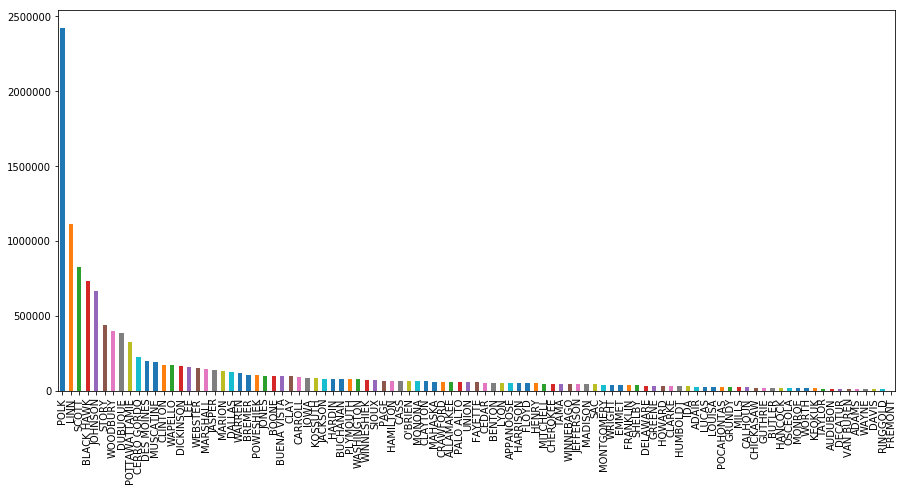

In [10]:
# Count sales by county
pd.set_option("max_rows",105)
countySales = liquor['County'].value_counts()

# Plot that
%matplotlib inline
countySales.plot(kind='bar', figsize=(15,7))

In [11]:
# Estimate populations by county
populations = (poverty['People_of_All_Ages_in_Poverty'] * 100 / poverty['Percent_of_People_of_All_Ages_in_Poverty']).astype(int).sort_values(ascending=False)
#populations

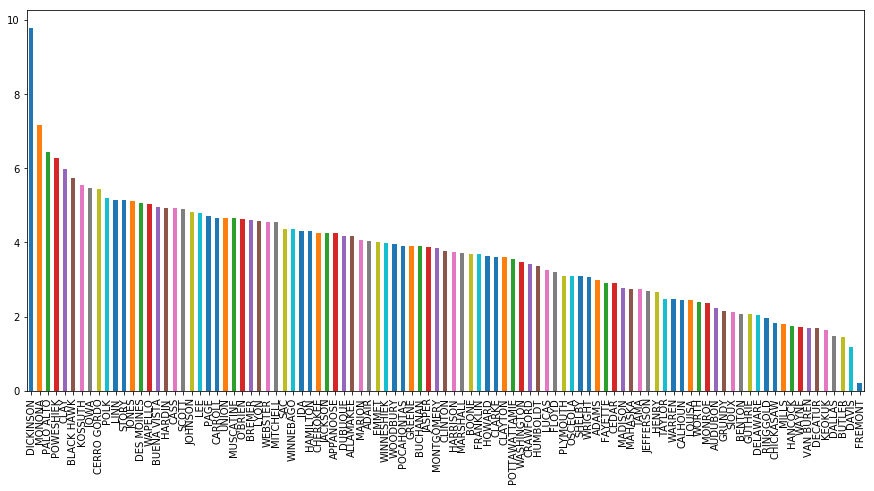

In [12]:
# Calculate and plot liquor sales per capita
salesPerCapita = (countySales / populations).sort_values(ascending=False)
salesPerCapita.plot(kind='bar', figsize=(15,7))

In [18]:
def getCountySales(county):
    return liquor.loc[liquor['County'] == county]

def getCountyVolume(county):
    return sum(getCountySales(county)['Volume Sold (Liters)'])

income.apply(getCountySales)

County
DALLAS           Empty DataFrame
Columns: [Date, Store Number, ...
MILLS            Empty DataFrame
Columns: [Date, Store Number, ...
WARREN           Empty DataFrame
Columns: [Date, Store Number, ...
SIOUX            Empty DataFrame
Columns: [Date, Store Number, ...
PLYMOUTH         Empty DataFrame
Columns: [Date, Store Number, ...
BREMER           Empty DataFrame
Columns: [Date, Store Number, ...
MADISON          Empty DataFrame
Columns: [Date, Store Number, ...
LINN             Empty DataFrame
Columns: [Date, Store Number, ...
POLK             Empty DataFrame
Columns: [Date, Store Number, ...
GRUNDY           Empty DataFrame
Columns: [Date, Store Number, ...
CEDAR            Empty DataFrame
Columns: [Date, Store Number, ...
BENTON           Empty DataFrame
Columns: [Date, Store Number, ...
LYON             Empty DataFrame
Columns: [Date, Store Number, ...
WINNESHIEK       Empty DataFrame
Columns: [Date, Store Number, ...
MARION           Empty DataFrame
Columns: [Date, Store 

In [13]:
# Get the median income of a county by name
def getIncome(county):
    return income.loc[county]

# Apply the income of the county to each sale
liquor['Median Household Income'] = liquor['County'].apply(getIncome)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
